In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
from Parameters import *
from Run_LCA_model import Run_LCA_model

In [3]:
buildings_path = '..\shapefiles\\building_block_people_WGS_3_subset.csv'
schedule = 'scheduled' 
logistics = 'optimal'
n_collection = 1
Result_Energy = pd.DataFrame()
Result_GHG = pd.DataFrame()
Result_Energy_m3 = pd.DataFrame()
Result_GHG_m3 = pd.DataFrame()
i=2
while i < 100:
    n_regen = i
    Total_Energy_total, Total_GHG_total, Total_Energy_m3, Total_GHG_m3 = Run_LCA_model(buildings_path, n_regen, n_collection, schedule, logistics)
    Result_Energy_m3 = Result_Energy_m3.append(Total_Energy_m3)
    Result_GHG_m3 = Result_GHG_m3.append(Total_GHG_m3)
    Result_Energy = Result_Energy_m3.append(Total_Energy_total)
    Result_GHG = Result_GHG_m3.append(Total_GHG_total)
    print i
    i = i+10

Start calculating distances for scheduled...
calc distances took time 329.128999949
2
Start calculating distances for scheduled...
calc distances took time 166.601000071
12
Start calculating distances for scheduled...
calc distances took time 93.5429999828
22
Start calculating distances for scheduled...
calc distances took time 72.4200000763
32
Start calculating distances for scheduled...
calc distances took time 54.9779999256
42
Start calculating distances for scheduled...
calc distances took time 47.9429998398
52
Start calculating distances for scheduled...
calc distances took time 43.8330001831
62
Start calculating distances for scheduled...
calc distances took time 38.2850000858
72
Start calculating distances for scheduled...
calc distances took time 35.237000227
82
Start calculating distances for scheduled...
calc distances took time 31.1600000858
92


In [15]:
Result_Energy_m3

,Resin manufacturing,Resin transport,Catridge manufacturing,Catridge transport,Tank manufacturing,Tank transport,Pump operation,Pump manufacturing,Pump transport,Acid manufacturing,Acid transport,Logistics_regen,Logistics_collect,n_facilities,sum
0,8.405088,0.004225,3.68634,0.000845,0.004236,0.001690,0.00099,0.001296,0.001690,0.947219,0.042248,28.678218,0.051669,2,41.825752
0,8.405088,0.015661,3.68634,0.003132,0.004541,0.006264,0.00099,0.004806,0.006264,0.947219,0.156607,22.267435,0.111120,12,35.615466
0,8.405088,0.030747,3.68634,0.006149,0.004794,0.012299,0.00099,0.009435,0.012299,0.947219,0.307470,22.915403,0.178531,22,36.516763
0,8.405088,0.043968,3.68634,0.008794,0.004966,0.017587,0.00099,0.013492,0.017587,0.947219,0.439683,22.820181,0.192136,32,36.598031
0,8.405088,0.057927,3.68634,0.011585,0.005129,0.023171,0.00099,0.017776,0.023171,0.947219,0.579267,22.956383,0.249455,42,36.963499
0,8.405088,0.071176,3.68634,0.014235,0.005258,0.028470,0.00099,0.021841,0.028470,0.947219,0.711761,22.789273,0.266425,52,36.976546
0,8.405088,0.084513,3.68634,0.016903,0.005378,0.033805,0.00099,0.025934,0.033805,0.947219,0.845130,22.657194,0.331768,62,37.074065
0,8.405088,0.097993,3.68634,0.019599,0.005480,0.039197,0.00099,0.030070,0.039197,0.947219,0.979933,22.554332,0.323199,72,37.128639
0,8.405088,0.111781,3.68634,0.022356,0.005580,0.044712,0.00099,0.034301,0.044712,0.947219,1.117808,22.705784,0.337652,82,37.464323
0,8.405088,0.125854,3.68634,0.025171,0.005682,0.050342,0.00099,0.038620,0.050342,0.947219,1.258540,22.780585,0.375098,92,37.749868


In [4]:
Result_Energy_m3["sum"] = (Result_Energy_m3.sum(axis=1)) - Result_Energy_m3["n_facilities"]
Result_GHG_m3["sum"] = (Result_GHG_m3.sum(axis=1)) - Result_GHG_m3["n_facilities"]

In [ ]:
Result_Energy_m3

Result_Energy_m3 = pd.read_csv('Energy_result.csv')
Result_GHG_m3 = pd.read_csv('GHG_result.csv')

Result_Energy_m3=pd.read_csv('Energy_result_unscheduled.csv')
Result_GHG_m3=pd.read_csv('GHG_result_unscheduled.csv')

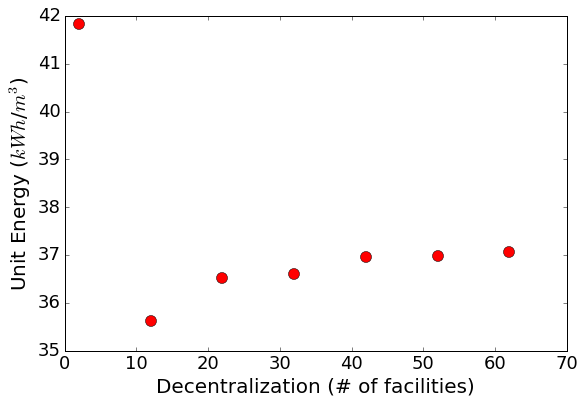

In [5]:
fig = plt.figure(figsize=(9,6))
plt.plot(Result_Energy_m3["n_facilities"], Result_Energy_m3["sum"], 'ro', markersize=11)
plt.xticks(fontsize = 18)
plt.xlim(0,70)
#plt.ylim(50,100)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)
plt.yticks(fontsize = 18)
plt.ylabel('Unit Energy ($kWh$/$m^3$)', fontsize = 20)

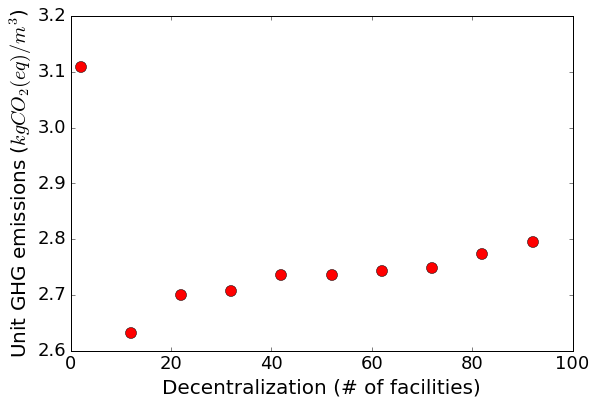

In [6]:
fig = plt.figure(figsize=(9,6))
plt.plot(Result_GHG_m3["n_facilities"], Result_GHG_m3["sum"], 'ro', markersize=11)
plt.xticks(fontsize = 18)
plt.xlim(0,100)
#plt.ylim(3.5,4.5)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)
plt.yticks(fontsize = 18)
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)', fontsize = 20)

In [7]:
Result_Energy_m3_plot = Result_Energy_m3[4:5].drop('sum',1).drop('n_facilities',1)
Result_GHG_m3_plot = Result_GHG_m3[4:5].drop('sum',1).drop('n_facilities',1)

In [8]:
Result_Energy_m3_plot['other'] = (Result_Energy_m3_plot['Resin transport'] + Result_Energy_m3_plot['Catridge transport']+
                                  Result_Energy_m3_plot['Tank transport'] + Result_Energy_m3_plot['Pump transport'] +
                                  Result_Energy_m3_plot['Acid transport']+ Result_Energy_m3_plot['Tank manufacturing'] +
                                 Result_Energy_m3_plot['Pump manufacturing'])
Result_GHG_m3_plot['other'] = (Result_GHG_m3_plot['Resin transport'] + Result_GHG_m3_plot['Catridge transport']+
                                  Result_GHG_m3_plot['Tank transport'] + Result_GHG_m3_plot['Pump transport'] +
                                  Result_GHG_m3_plot['Acid transport'] + Result_GHG_m3_plot['Tank manufacturing'] +
                                 Result_GHG_m3_plot['Pump manufacturing'])

Result_Energy_m3_plot = Result_Energy_m3_plot.drop(['Resin transport', 'Catridge transport', 
                                                    'Tank transport', 'Pump transport', 'Acid transport', 'Tank manufacturing',
                                                   'Pump manufacturing'] , 1)
Result_GHG_m3_plot = Result_GHG_m3_plot.drop(['Resin transport', 'Catridge transport', 
                                                    'Tank transport', 'Pump transport', 'Acid transport', 'Tank manufacturing',
                                                   'Pump manufacturing'] , 1)

In [ ]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1,2, 1)
a=Result_Energy_m3_plot.plot(kind='bar', stacked = True, ax=ax, legend=False,colormap='PRGn')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Unit Energy ($kWh$/$m^3$)',fontsize=18)
ax = fig.add_subplot(1,2, 2)
b=Result_GHG_m3_plot.plot(kind='bar', stacked = True, secondary_y=True, ax=ax, legend=False,colormap='PRGn')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)',fontsize=18)
b.legend(loc='lower center', bbox_to_anchor=(-0.1, 1.05),ncol=2, fancybox=True, shadow=True,fontsize=16)
fig.tight_layout()